___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [3]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [35]:
# Bank of America
BAC = yf.download("BAC", start, end)

# CitiGroup
C = yf.download("C", start, end)

# Goldman Sachs
GS = yf.download("GS", start, end)

# JPMorgan Chase
JPM = yf.download("JPM", start, end)

# Morgan Stanley
MS = yf.download("MS", start, end)

# Wells Fargo
WFC = yf.download("WFC", start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [37]:
# df = yf.download(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [40]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [43]:
bankStocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [45]:
bankStocks.columns

MultiIndex([('BAC',  'Close', 'BAC'),
            ('BAC',   'High', 'BAC'),
            ('BAC',    'Low', 'BAC'),
            ('BAC',   'Open', 'BAC'),
            ('BAC', 'Volume', 'BAC'),
            (  'C',  'Close',   'C'),
            (  'C',   'High',   'C'),
            (  'C',    'Low',   'C'),
            (  'C',   'Open',   'C'),
            (  'C', 'Volume',   'C'),
            ( 'GS',  'Close',  'GS'),
            ( 'GS',   'High',  'GS'),
            ( 'GS',    'Low',  'GS'),
            ( 'GS',   'Open',  'GS'),
            ( 'GS', 'Volume',  'GS'),
            ('JPM',  'Close', 'JPM'),
            ('JPM',   'High', 'JPM'),
            ('JPM',    'Low', 'JPM'),
            ('JPM',   'Open', 'JPM'),
            ('JPM', 'Volume', 'JPM'),
            ( 'MS',  'Close',  'MS'),
            ( 'MS',   'High',  'MS'),
            ( 'MS',    'Low',  'MS'),
            ( 'MS',   'Open',  'MS'),
            ( 'MS', 'Volume',  'MS'),
            ('WFC',  'Close', 'WFC'),
            

In [47]:
bankStocks.columns = bankStocks.columns.droplevel(2)

In [49]:
bankStocks.columns.nlevels

2

** Set the column name levels (this is filled out for you):**

In [52]:
bankStocks.columns.names = ['Bank Ticker', 'Stock Info']

** Check the head of the bank_stocks dataframe.**

In [55]:
bankStocks.head()

Bank Ticker        BAC                                                      C  \
Stock Info       Close       High        Low       Open    Volume       Close   
Date                                                                            
2006-01-03   31.173681  31.239895  30.557888  31.067736  16296700  324.013123   
2006-01-04   30.842606  31.279620  30.756526  31.120704  17757900  318.031128   
2006-01-05   30.882328  31.008137  30.670443  30.842601  14970700  319.608826   
2006-01-06   30.835972  31.061100  30.690300  30.988264  12599800  319.608826   
2006-01-09   30.855846  31.100841  30.696934  30.935305  15619400  318.096802   

Bank Ticker                                               ...         MS  \
Stock Info         High         Low        Open   Volume  ...      Close   
Date                                                      ...              
2006-01-03   324.604743  316.256273  322.106780  1537600  ...  32.190922   
2006-01-04   322.764133  317.833928  321.186472  1870960  ...  32.212982   
2006-01-05   320.660587  318.162624  318.425564  1143160  ...  32.301331   
2006-01-06   321.449428  316.847902  321.317948  1370210  ...  32.334446   
2006-01-09   320.397564  317.505181  319.477263  1680740  ...  32.676723   

Bank Ticker                                                  WFC             \
Stock Info        High        Low       Open   Volume      Close       High   
Date                                                                          
2006-01-03   32.290294  31.324180  31.561566  5377000  18.778112  18.822262   
2006-01-04   32.726403  32.212982  32.406206  7977800  18.560307  18.731016   
2006-01-05   32.345497  32.030820  32.323414  5778000  18.539703  18.575022   
2006-01-06   32.489023  32.047372  32.444859  6889800  18.648607  18.704529   
2006-01-09   32.731931  32.362047  32.367568  4144500  18.645660  18.733960   

Bank Ticker                                  
Stock Info         Low       Open    Volume  
Date                                         
2006-01-03   18.363110  18.601516  11016400  
2006-01-04   18.463178  18.719243  10870000  
2006-01-05   18.430801  18.542646  10158000  
2006-01-06   18.474954  18.589741   8403800  
2006-01-09   18.575022  18.645660   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [58]:
bankStocks.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     37.699585
C      386.292786
GS     186.076141
JPM     53.933887
MS      50.462807
WFC     44.268101
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [61]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [64]:
for tick in tickers:
    returns[tick + 'Return'] = bankStocks[tick]['Close'].pct_change()
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013813,-0.005771,0.000685,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002743,-0.001110
2006-01-06,-0.001501,0.000000,0.014168,0.007046,0.001025,0.005874
2006-01-09,0.000645,-0.004731,0.012031,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

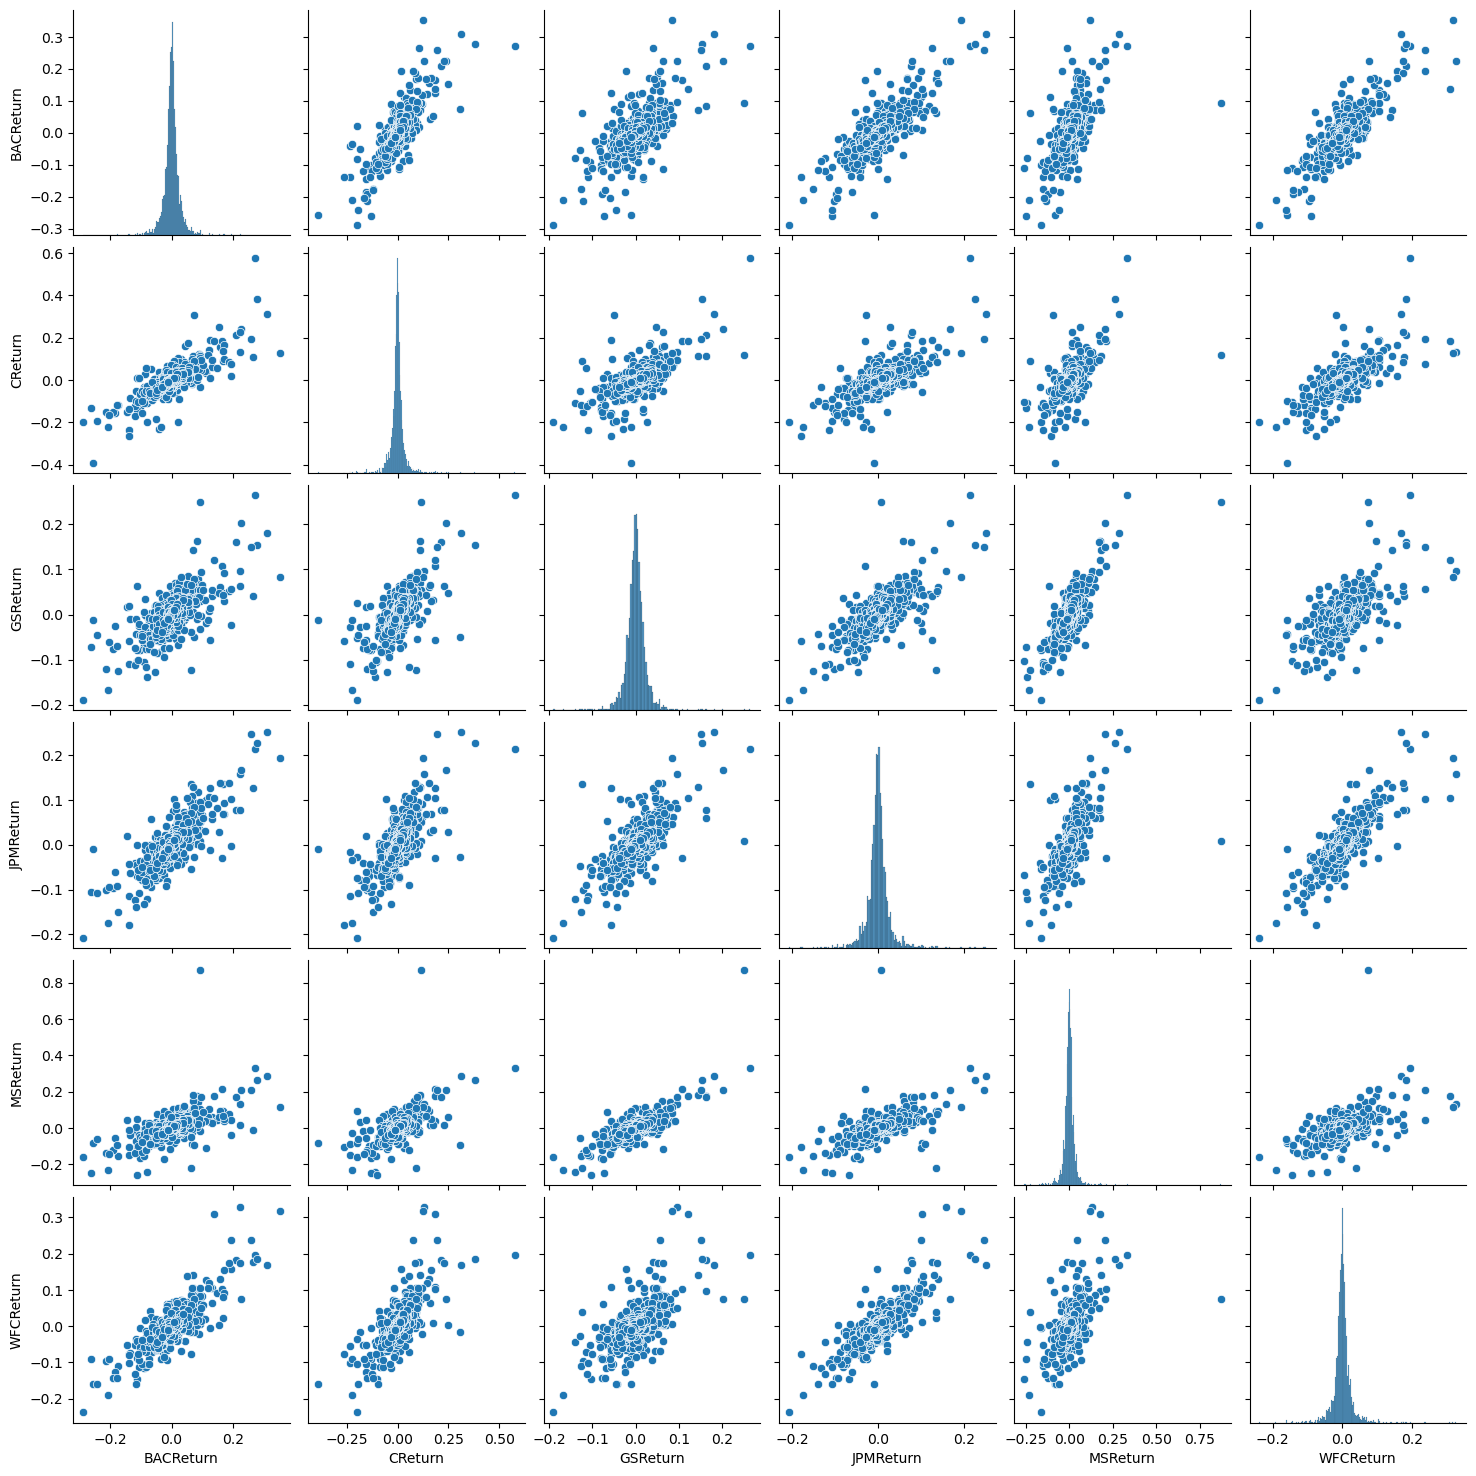

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(returns[1:])
plt.show()
plt.close()

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [70]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [73]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [75]:
returns.std()

BACReturn    0.036659
CReturn      0.038672
GSReturn     0.025386
JPMReturn    0.027675
MSReturn     0.037717
WFCReturn    0.030195
dtype: float64

In [76]:
returns.loc['2015-01-01':'2015-12-31'].std()

BACReturn    0.016174
CReturn      0.015288
GSReturn     0.014043
JPMReturn    0.014006
MSReturn     0.016287
WFCReturn    0.012552
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

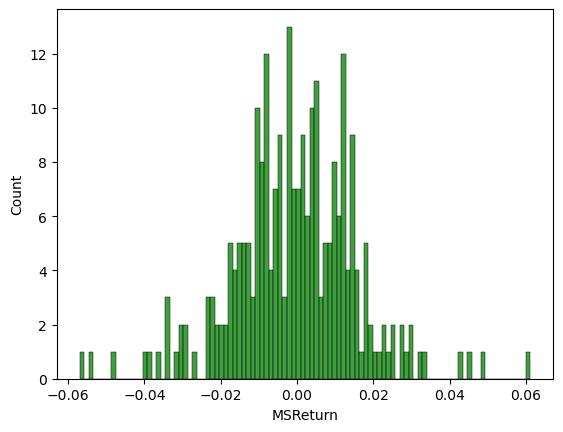

In [83]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MSReturn'], color = 'green', bins = 100)
plt.show()
plt.close()

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

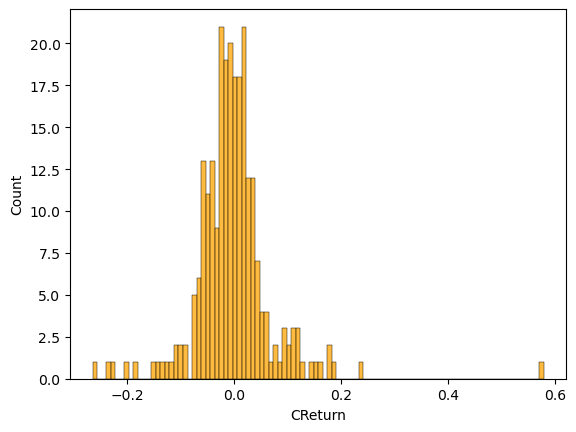

In [86]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['CReturn'], color = 'orange', bins = 100)
plt.show()
plt.close()

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [89]:
sns.set_style('whitegrid')

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

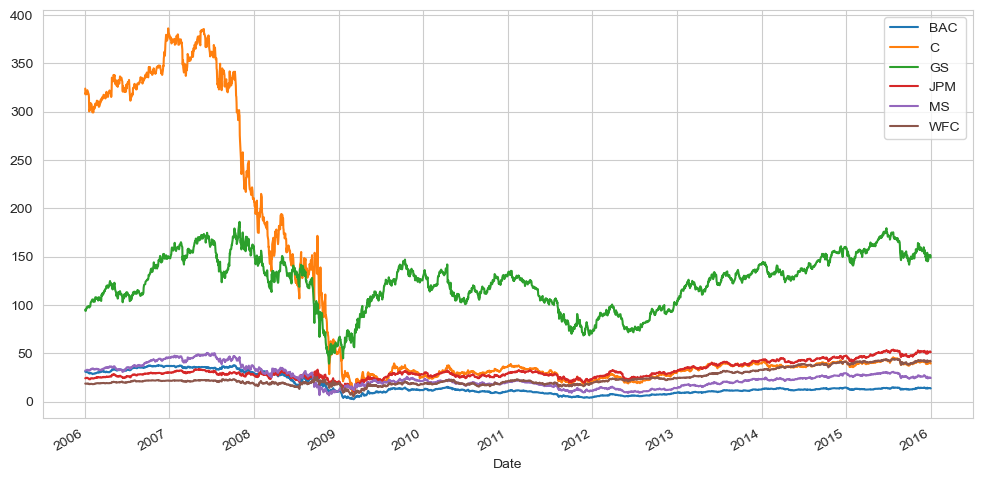

In [92]:
for tick in tickers:
    bankStocks[tick]['Close'].plot(figsize=(12,6), label = tick)
plt.legend()
plt.show()
plt.close()

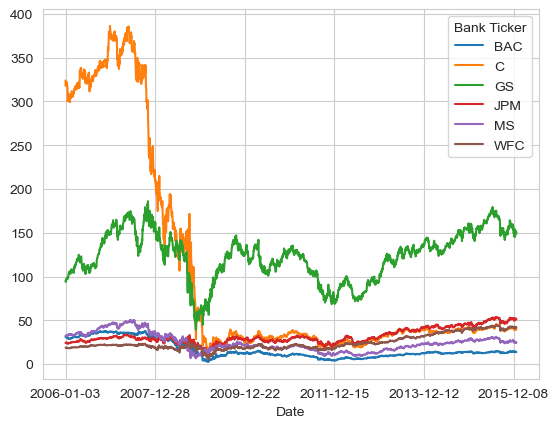

In [100]:
bankStocks.xs(key='Close',axis=1,level='Stock Info').plot()
plt.show()
plt.close()

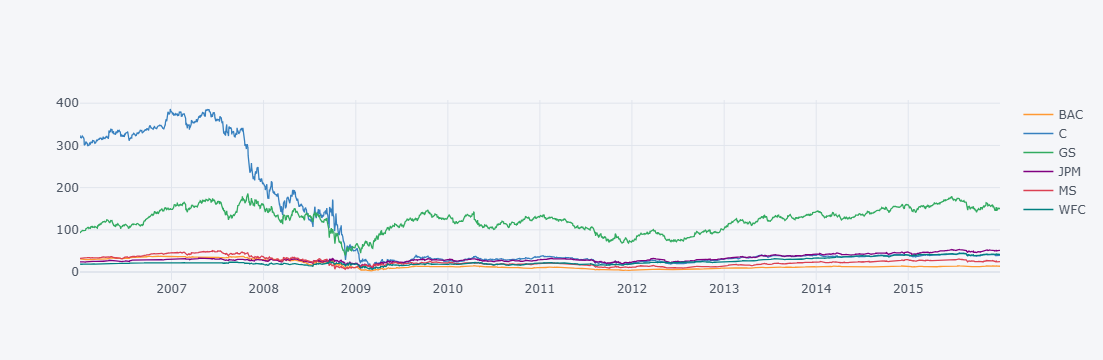

In [102]:
bankStocks.index = bankStocks.index.astype(str)
bankStocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

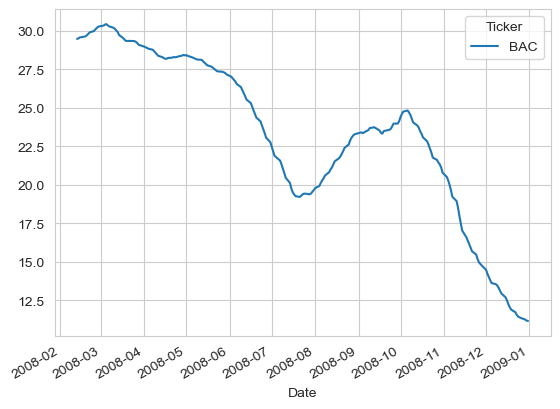

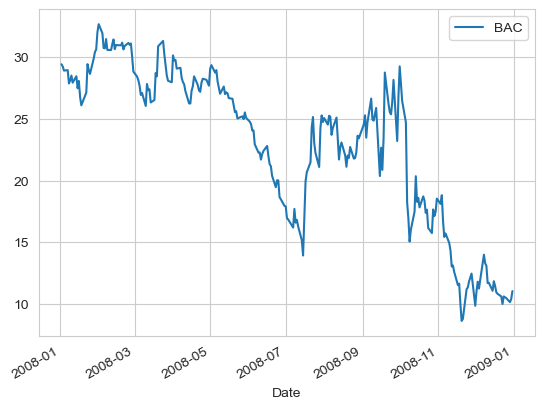

In [105]:
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window = 30).mean().plot(label = '30 Day Avg')
BAC['Close'].loc['2008-01-01':'2008-12-31'].plot(label = 'BAC Close')
plt.legend()
plt.show()
plt.close()

** Create a heatmap of the correlation between the stocks Close Price.**

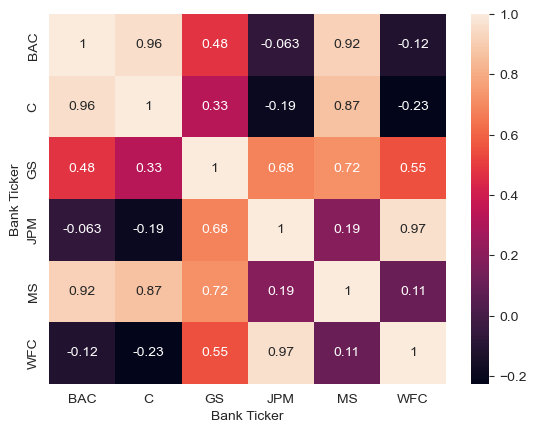

In [108]:
sns.heatmap(bankStocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True)
plt.show()
plt.close()

** Optional: Use seaborn's clustermap to cluster the correlations together:**

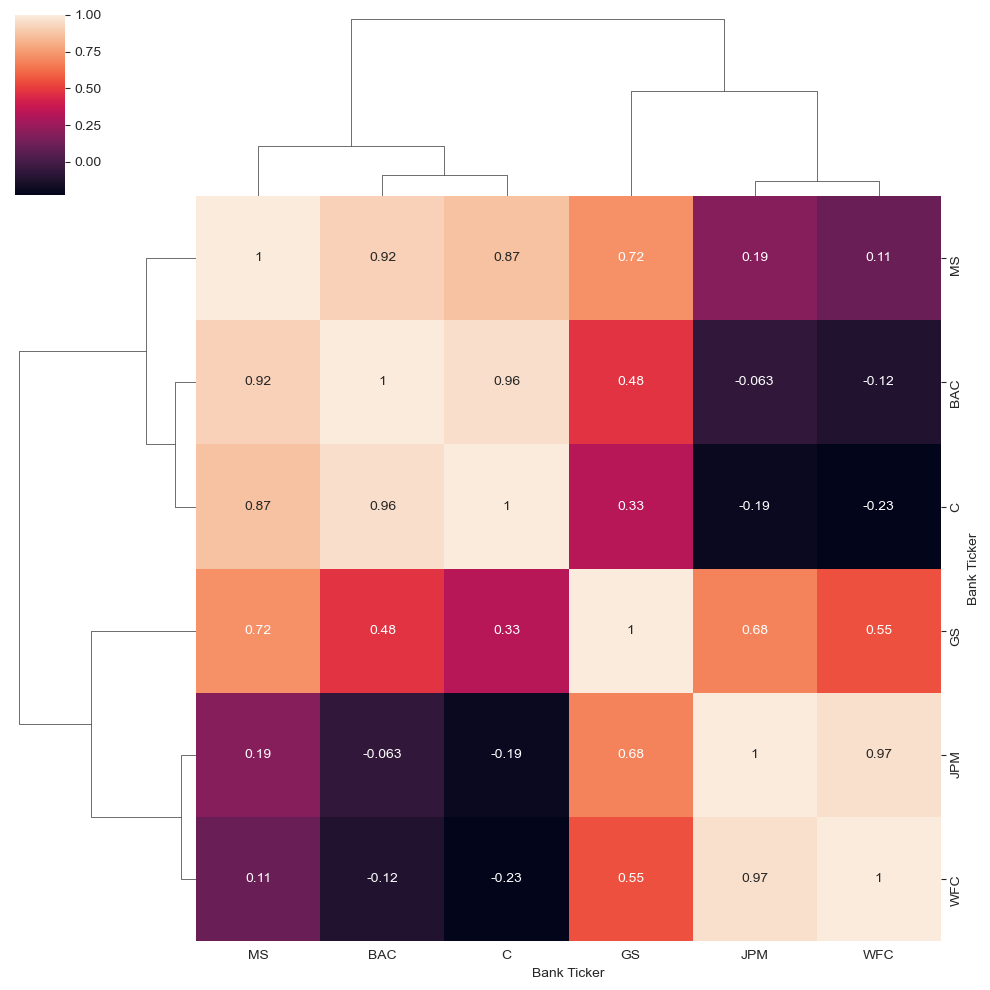

In [111]:
sns.clustermap(bankStocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True)
plt.show()
plt.close()

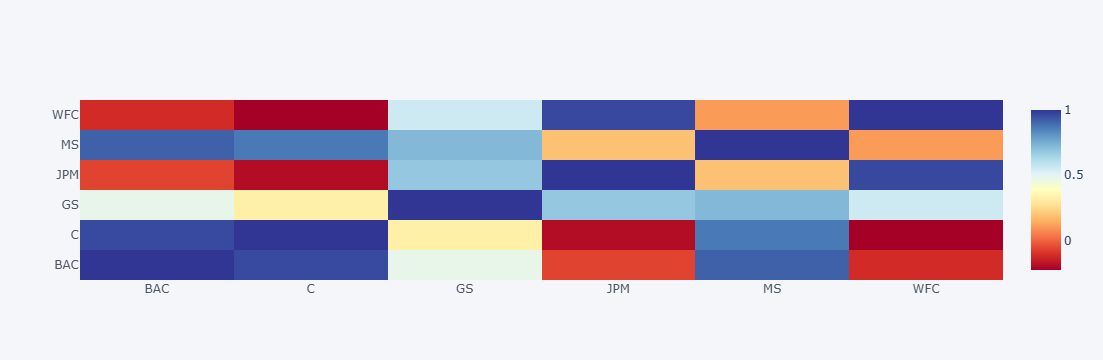

In [113]:
close_corr = bankStocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [117]:
print(BAC.columns)

MultiIndex([( 'Close', 'BAC'),
            (  'High', 'BAC'),
            (   'Low', 'BAC'),
            (  'Open', 'BAC'),
            ('Volume', 'BAC')],
           names=['Price', 'Ticker'])


** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

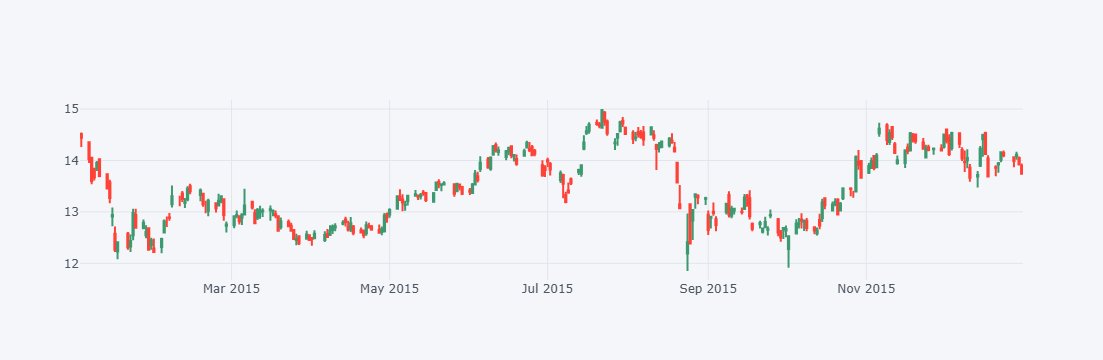

In [126]:
BAC_single = BAC.xs(key='BAC', axis=1, level='Ticker')

BAC_single[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

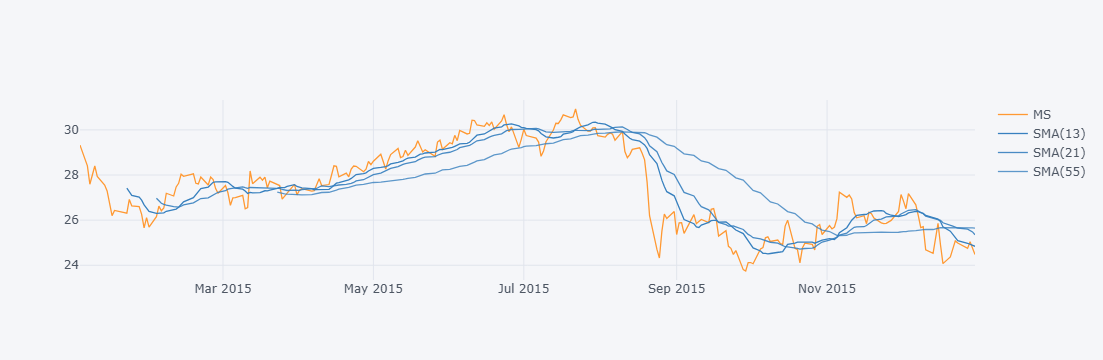

In [132]:
MS.index = MS.index.astype(str)
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

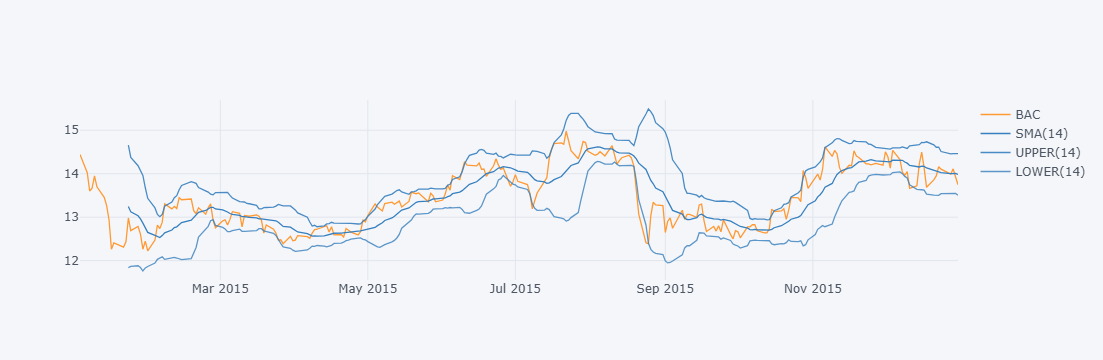

In [138]:
BAC.index = BAC.index.astype(str)
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.